FIIT STU v Bratislave, ZS 2019/2020, Utorok 11:00

---

# Projekt z predmetu Inteligentná analýza údajov
### Michal Heban, Ivana Frankovičová
Datasety č. 10

---

## 1. fáza - Prieskumná analýza


Na začiatok načítame potrebné knižnice a datasety.
Používať budeme datasety other_train.csv a personal_train.csv. Zistili sme, že v datasetoch sú jednotlivé údaje oddelené čiarkou a prvý stĺpec môžeme nastaviť ako index.

In [121]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb;
import re
import statistics as st
from scipy import stats

In [141]:
other_train = pd.read_csv("other_train.csv", sep=',', index_col = 0)

In [111]:
other_valid = pd.read_csv("other_valid.csv")

In [118]:
personal_train = pd.read_csv("personal_train.csv",sep=',', index_col = 0)

In [119]:
personal_valid = pd.read_csv("personal_valid.csv")

# DATASET personal_train

Dataset personal_train obsahuje osobné údaje o ľuďoch, ktorí sa zúčastnili meraní.

In [120]:
personal_train.head(10)

,name,address,age,sex,date_of_birth
0,Roscoe Bohannon,"7183 Osborne Ways Apt. 651\r\nEast Andrew, OH ...",39,Male,1979-12-14
1,Ernest Kline,"391 Ball Road Suite 961\r\nFlowersborough, IN ...",65,Female,1953-11-21
2,Harold Hendriks,"8702 Vincent Square\r\nNew Jerryfurt, CO 30614",50,Female,1969-03-06
3,Randy Baptiste,"2751 Harris Crossroad\r\nWest Ashley, CA 30311",47,Male,1972-02-28
4,Anthony Colucci,"904 Robert Cliffs Suite 186\r\nWest Kyle, CO 7...",46,Female,1973-10-05 00 00 00
5,Ronald Lange,"30973 Martinez Shores\r\nJameston, CA 70245",-5600,Male,1963-07-25 00:00:00
6,Boyd Eiselein,29941 Christopher Curve Apt. 682\r\nRaychester...,57,Female,1962-08-22 00:00:00
7,Raymond Smith,53487 Scott Extensions Apt. 824\r\nMccartytown...,70,Male,1948-10-30 00:00:00
8,Harold Miller,"8514 Elizabeth Crescent\r\nWest Joseland, GA 4...",49,Male,17/02/1970
9,Charles Czachorowski,"6798 Wagner Locks Suite 377\r\nLake Brenda, DC...",5200,Male,1967-01-04


Zobrazíme si informácie o datasete.

In [122]:
personal_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3933 entries, 0 to 3932
Data columns (total 5 columns):
name             3933 non-null object
address          3933 non-null object
age              3933 non-null int64
sex              3933 non-null object
date_of_birth    3933 non-null object
dtypes: int64(1), object(4)
memory usage: 184.4+ KB


### Opis atribútov 
**počet záznamov: 3933**, 
**počet atribútov: 5**

* **name** 
    - meno osoby v datasete
    - type object
* **address** 
    - adresa osoby v datasete
    - type object
* **age** 
    - vek osoby v datasete
    - type int64
* **sex** 
    - pohlavie osoby v datasete
    - type object
* **date_of_birth** 
    - dátum narodenia osoby v datasete
    - type object

In [123]:
personal_train.isna().sum()

name             0
address          0
age              0
sex              0
date_of_birth    0
dtype: int64

Zistili sme, že v datasete sa nenachádzajú žiadne chýbajúce hodnoty.

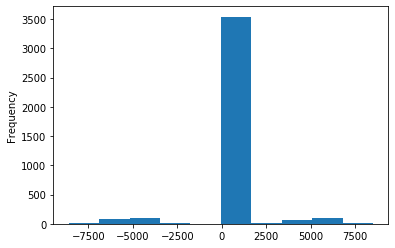

In [124]:
personal_train["age"].plot.hist()

Ako vyplýva z grafu, v datasete sa nachádzajú nezmyselné údaje, keďže človek nemôže mať menej ako 0 rokov a ani viac ako napríklad 130 rokov.

In [125]:
personal_train = personal_train[(personal_train.age < 130) & (personal_train.age >= 0)]

Odfiltrovali sme záznamy, kde mali ľudia zaznamenaný vek menší ako 0 alebo väčší ako 130. Urobili sme tak preto, aby sa z údajov dala spraviť základná štatistika a nebola tak skreslená nezmyselnými príliš veľkými alebo príliš malými číslami. A takto rozumnejšie teraz vyzerá histogram veku ľudí:

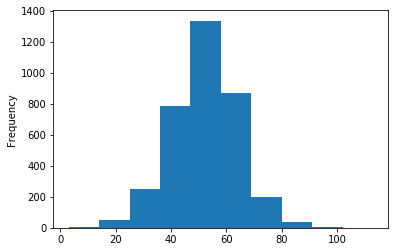

In [126]:
personal_train["age"].plot.hist()

In [127]:
personal_train.describe(include = np.number)

,age
count,3539.000000
mean,51.771404
std,11.813298
min,3.000000
25%,44.000000
50%,52.000000
75%,59.000000
max,113.000000


Deskriptívna štatistika pre číselné atribúty.

In [128]:
personal_train.describe(exclude = np.number)

,name,address,sex,date_of_birth
count,3539,3539,3539,3539
unique,3539,3539,2,3359
top,Leonard Cope,"521 Gallegos Islands\r\nWest Brian, KS 37357",Male,1963-08-16
freq,1,1,2384,3


Deskriptívna štatistika pre nečíselné atribúty.

In [129]:
personal_train['sex'].unique()

array([' Male', ' Female'], dtype=object)

Keďže atribút pohlavie je kategorický, overili sme si, či sa tam nachádzajú kategórie muž a žena v konzistentných formátoch.

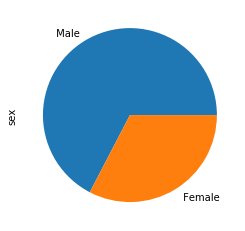

In [130]:
personal_train['sex'].value_counts().plot(kind="pie")

Vykreslenie pomeru mužov a žien.

### Deskriptívne štatistické údaje pre nečíselné atribúty nám vrátili:

* počet unikátnych mien sa zhoduje s celkovým počtom mien, z čoho vyplýva, že v datasete nie sú žiadni menovci (duplikáty)
* atribút pohlavia je distribuovaný iba medzi dve hodnoty, a to na mužov a ženy
* z 3933 ľudí v datasete až 2646 záznamov patrí mužom
* najčastejší dátum narodenia je 12. februára 1963, presne 4 osoby sa narodili v rovnaký deň

### Deskriptívne štatistické údaje pre číselné atribúty nám vrátili:

* primerný vek je 51,77 roka
* až 75% záznamov je od ľudí starších ako 44 rokov
* iba 25% záznamov je od ľudí starších ako 59 rokov
* medzikvartilové rozpätie je teda 15 rokov a z predošlých záznamov nám z toho vyplýva, že 50% záznamov je od ľudí približne stredného veku
* vekový rozsah je od 3 po 113 rokov


###  Problémy v datasete
* dátumy narodenia sú v rôznych formátoch
* roky niektorých ľudí sú mimo rozumný rozsah
* v adrese sa nachádzajú znaky \r\n

Párovú analýzu a hypotézy nemá v tomto datasete zmysel robiť.





# DATASET other_train

Dataset other_train obsahuje zdravotné údaje o ľuďoch, ktorí sa zúčastnili meraní.

In [146]:
other_train.head(3)

,name,address,kurtosis_oxygen,pregnant,education-num,relationship,skewness_glucose,mean_glucose,std_oxygen,capital-gain,...,kurtosis_glucose,personal_info,education,fnlwgt,class,std_glucose,income,mean_oxygen,hours-per-week,capital-loss
0,Brian Newhall,"52925 Barton Ville Suite 664\r\nEast Whitney, ...",8.289889,f,14.0,Not-in-family,-0.378956,119.445312,17.929757,0.0,...,0.012830,Craft-repair|United-States\r\r\nNever-married ...,Masters,192702.0,0.0,53.143057,<=50K,2.932274,50.0,0.0
1,Patrick Behne,"037 Long Springs\r\nPort Maria, OH 58969",4.322444,t,6.0,Husband,4.146348,77.085938,43.980061,0.0,...,1.620462,Other-service|United-States\r\r\nMarried-civ-s...,10th,211116.0,1.0,43.391932,<=50K,10.596154,40.0,0.0
2,Steven Arnold,"471 Kevin Spurs Suite 564\r\nReneeland, NC 84482",4.702130,f,5.0,Own-child,-0.170853,126.046875,36.950157,0.0,...,-0.139295,Machine-op-inspct|United-States\r\r\nNever-mar...,9th,173736.0,0.0,50.909365,<=50K,7.939799,40.0,0.0


In [144]:
other_train.personal_info.head()

0    Craft-repair|United-States\r\r\nNever-married ...
1    Other-service|United-States\r\r\nMarried-civ-s...
2    Machine-op-inspct|United-States\r\r\nNever-mar...
3    Prof-specialty|United-States\r\r\nMarried-civ-...
4    Sales|United-States\r\r\nMarried-civ-spouse --...
Name: personal_info, dtype: object

Všimli sme si, že atribút personal_info v sebe ukrýva osobné údaje - ďalšie atribúty. Chceme ho rozložiť, aby sme s ním vedeli pracovať.

In [149]:
def process_pi(text):
    if pd.isnull(text):
        return pd.Series([np.nan]*5)
    splitted_pi = re.split('[| \r\r\n]',text)
    splitted_pi = list(filter(None,splitted_pi))
    splitted_pi.remove("--")
    return pd.Series([splitted_pi[0],splitted_pi[1],splitted_pi[2],splitted_pi[3],splitted_pi[4]])

Funkcia process_pi vie rozdeliť reťazec na jednotlivé atribúty podľa oddeľujúcich znakov.

In [150]:
other_train[['job','state','family_status','home','color']] = other_train['personal_info'].apply(process_pi)

Rozloženie atribútu personal_info.

In [151]:
del other_train["personal_info"]

Vymazanie samotného atribútu personal_info - je už zbytočný.

Zobrazíme si informácie o datasete.

In [152]:
other_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3983 entries, 0 to 3982
Data columns (total 25 columns):
name                3983 non-null object
address             3983 non-null object
kurtosis_oxygen     3962 non-null float64
pregnant            3968 non-null object
education-num       3972 non-null float64
relationship        3970 non-null object
skewness_glucose    3971 non-null float64
mean_glucose        3567 non-null float64
std_oxygen          3965 non-null float64
capital-gain        3975 non-null float64
skewness_oxygen     3968 non-null float64
kurtosis_glucose    3969 non-null float64
education           3969 non-null object
fnlwgt              3964 non-null float64
class               3970 non-null float64
std_glucose         3974 non-null float64
income              3968 non-null object
mean_oxygen         3969 non-null float64
hours-per-week      3967 non-null float64
capital-loss        3971 non-null float64
job                 3970 non-null object
state             

### Opis atribútov 
**počet záznamov: 3983**, 
**počet atribútov: 25** (po rozložení atribútu personal_info do viacerých atribútov)

###### Základné údaje:
* **name** 
    - meno osoby
    - typ object
* **address**
    - adresa osoby
    - typ object
* **state**               
    - štát
    - typ object
* **class**               
    - stav cukrovky
    - typ float64
    
###### Meranie cukru:
* **mean_glucose**
    - priemerná hodnota cukru
    - typ float64
* **std_glucose**
    - štandardná odchýlka pri meraní cukru
    - typ float64
* **skewness_glucose** 
    - koeficient asymetrie z hodnôt cukru
    - typ float64
* **kurtosis_glucose**    
    - koeficient špicatosti z hodnôt cukru
    - typ float64
    
###### Meranie kyslíka:
* **mean_oxygen**
    - priemerná hodnota kyslíka
    - typ float64
* **std_oxygen** 
    - štandardná odchýlka pri meraní kyslíka 
    - typ float64
* **skewness_oxygen**     
    - koeficient asymetrie z hodnôt kyslíka
    - typ float64
* **kurtosis_oxygen**
    - koeficient špicatosti z hodnôt kyslíka
    - typ float64
    
###### Iné údaje:
* **pregnant**
    - stav tehotenstva
    - typ object
* **home**                
    - typ bývania
    - typ object
* **education**           
    - najvyššie dosiahnuté vzdelanie
    - typ object
* **education-num**
    - vzdelanie
    - typ float64
* **family_status**       
    - rodinný stav 
    - typ object
* **relationship** 
    - vzťah
    - typ float64
* **job**                
    - práca
    - typ object
* **income**
    - príjem osoby 
    - typ object
* **hours-per-week**
    - pracovný čas 
    - typ float64
* **capital-gain**
    - zarobený kapitál 
    - typ float64
* **capital-loss**  
    - stratený kapitál 
    - typ float64
* **fnlwgt**              
    - dôležitosť osoby 
    - typ float64
* **color**               
    - rasa 
    - typ object

In [139]:
other_train.isna().sum()

name                  0
address               0
kurtosis_oxygen      21
pregnant             15
education-num        11
relationship         13
skewness_glucose     12
mean_glucose        416
std_oxygen           18
capital-gain          8
skewness_oxygen      15
kurtosis_glucose     14
education            14
fnlwgt               19
class                13
std_glucose           9
income               15
mean_oxygen          14
hours-per-week       16
capital-loss         12
job                  13
state                13
family_status        13
home                 13
color                13
dtype: int64

Tento dataset má množstvo nevyplnených údajov, najviac chýbajúcich je pre atribút mean_glucose. Tieto hodnoty bude potrebné v 2. fáze upraviť alebo odstrániť.

## Analýza po jednom: Numerické atribúty

In [153]:
other_train.describe(include = np.number)

,kurtosis_oxygen,education-num,skewness_glucose,mean_glucose,std_oxygen,capital-gain,skewness_oxygen,kurtosis_glucose,fnlwgt,class,std_glucose,mean_oxygen,hours-per-week,capital-loss
count,3962.000000,3972.000000,3971.000000,3567.000000,3965.000000,3975.000000,3968.000000,3969.000000,3.964000e+03,3970.000000,3974.000000,3969.000000,3967.000000,3971.000000
mean,7.428899,10.085851,4.192579,101.327023,31.117496,932.459371,91.430852,0.946330,1.905427e+05,0.254660,45.196785,18.374766,40.666247,88.003274
std,4.817449,2.617172,9.648298,33.521820,22.262023,6403.008032,108.622734,1.605552,1.041594e+05,0.435725,7.613055,34.663280,12.171287,403.844322
min,-2.597872,1.000000,-1.755332,6.187500,7.370432,0.000000,-1.976976,-1.641515,1.941000e+04,0.000000,25.695250,0.213211,1.000000,0.000000
25%,3.667526,9.000000,-0.120195,87.660156,15.024700,0.000000,12.928386,0.071229,1.178878e+05,0.000000,40.199113,2.061873,40.000000,0.000000
50%,7.787156,10.000000,0.372981,110.640625,20.547873,0.000000,68.505049,0.310186,1.807455e+05,0.000000,45.895487,3.237458,40.000000,0.000000
75%,10.278883,13.000000,2.067417,124.277344,43.124802,0.000000,127.057043,0.770947,2.384682e+05,1.000000,50.376893,12.603679,45.000000,0.000000
max,34.539844,16.000000,68.101622,189.734375,110.642211,99999.000000,1191.000837,8.069522,1.268339e+06,1.000000,91.206475,217.371238,99.000000,3900.000000


Základná deskriptívna štatistika pre numerické atribúty.

### kurtosis_oxygen

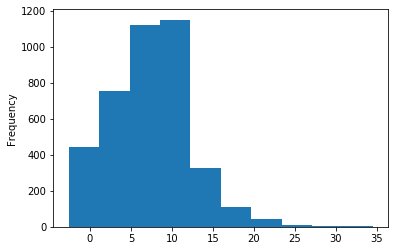

In [155]:
other_train["kurtosis_oxygen"].plot.hist()

### education-num

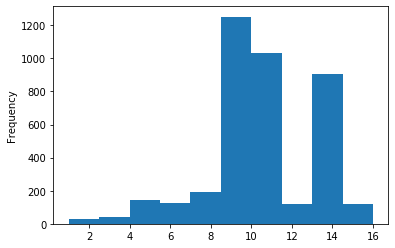

In [162]:
other_train["education-num"].plot.hist()

### skewness_glucose

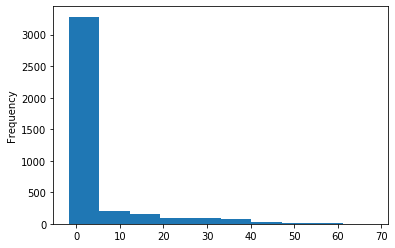

In [163]:
other_train["skewness_glucose"].plot.hist()

### mean_glucose

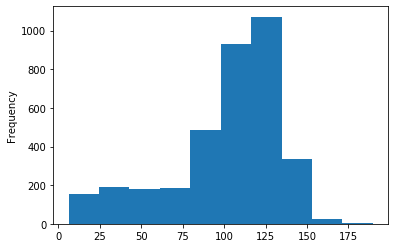

In [175]:
other_train["mean_glucose"].plot.hist()

### std_oxygen

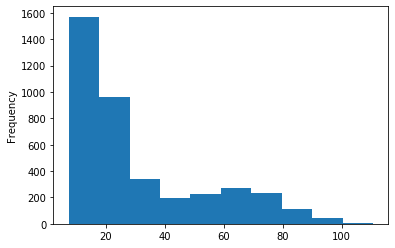

In [176]:
other_train["std_oxygen"].plot.hist()

### capital-gain

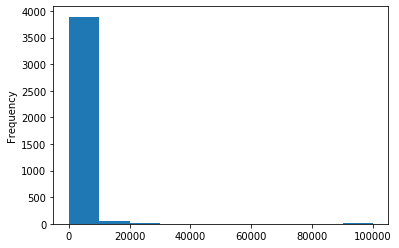

In [178]:
other_train["capital-gain"].plot.hist()

### skewness_oxygen

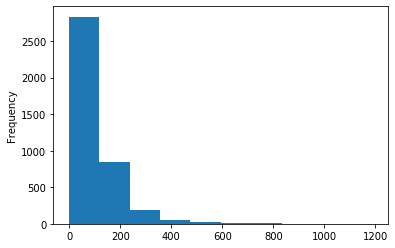

In [179]:
other_train["skewness_oxygen"].plot.hist()

### kurtosis_glucose

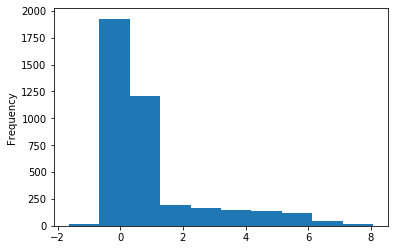

In [180]:
other_train["kurtosis_glucose"].plot.hist()

### fnlwgt

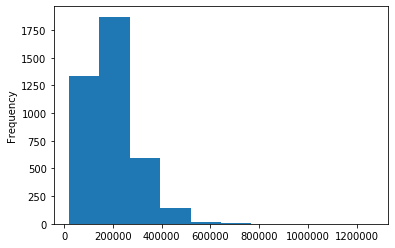

In [181]:
other_train["fnlwgt"].plot.hist()

### std_glucose

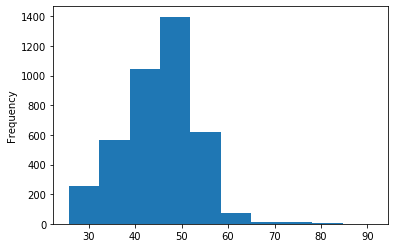

In [167]:
other_train["std_glucose"].plot.hist()

### mean_oxygen

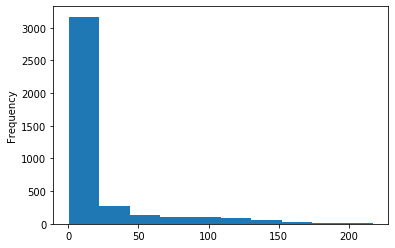

In [166]:
other_train["mean_oxygen"].plot.hist()

### hours-per-week

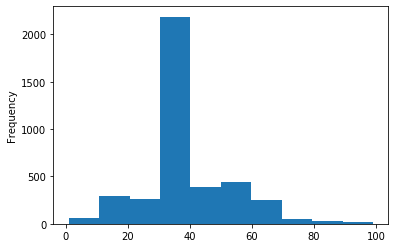

In [165]:
other_train["hours-per-week"].plot.hist()

### capital-loss

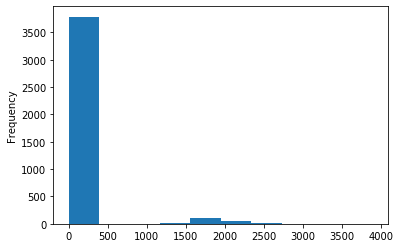

In [184]:
other_train["capital-loss"].plot.hist()

## Analýza po jednom: Kategorické atribúty

In [183]:
other_train.describe(exclude = np.number)

,name,address,pregnant,relationship,education,income,job,state,family_status,home,color
count,3983,3983,3968,3970,3969,3968,3970,3970,3970,3970,3970
unique,3933,3933,6,6,24,2,15,37,7,11,5
top,Anthony Colucci,"781 Moore Throughway\r\nAshleyfurt, WY 94154",f,Husband,HS-grad,<=50K,Prof-specialty,United-States,Married-civ-spouse,Private,White
freq,2,2,3486,1621,1117,3017,495,3545,1816,2499,3407


Základná deskriptívna štatistika pre nenumerické atribúty.

### name?

### address?

### class

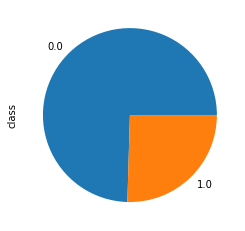

In [213]:
other_train['class'].value_counts().plot(kind='pie')

### pregnant

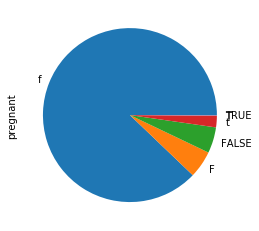

In [214]:
other_train['pregnant'].value_counts().plot(kind='pie')

Tieto hodnoty bude potrebné upraviť do jedného spoločného formátu.

### relationship

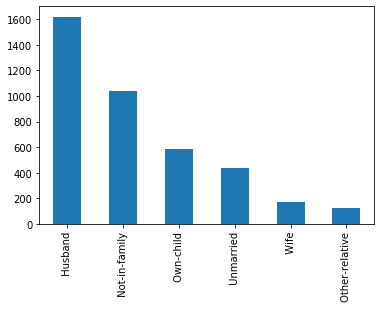

In [204]:
other_train['relationship'].value_counts().plot(kind='bar')

### education

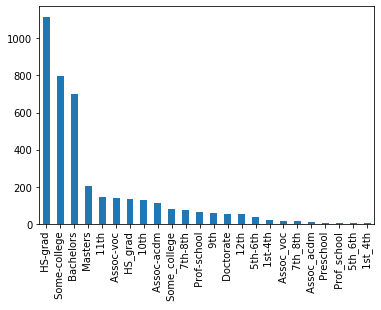

In [205]:
other_train['education'].value_counts().plot(kind='bar')

### income

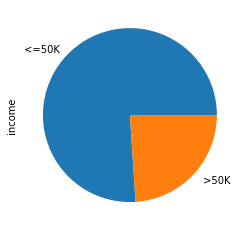

In [215]:
other_train['income'].value_counts().plot(kind='pie')

### job

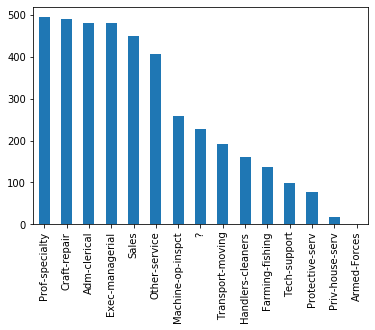

In [207]:
other_train['job'].value_counts().plot(kind='bar')

### state

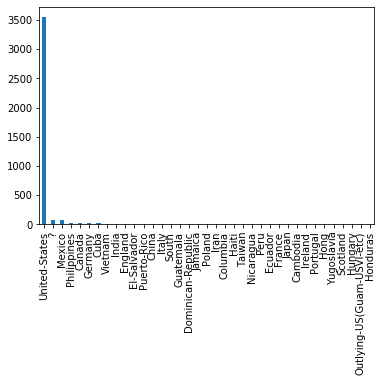

In [209]:
other_train['state'].value_counts().plot(kind='bar')

### family_status

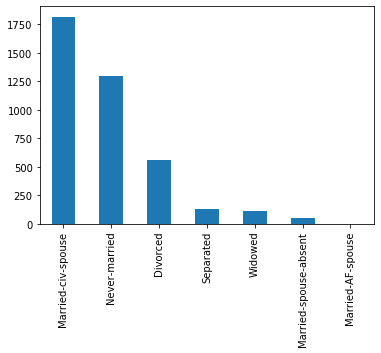

In [210]:
other_train['family_status'].value_counts().plot(kind='bar')

### home - #TODO premenovať atribút

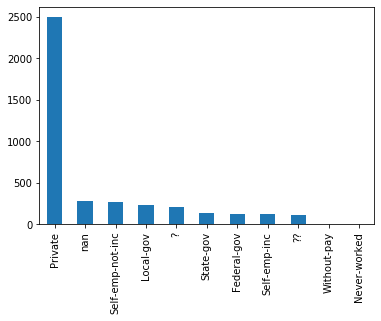

In [211]:
other_train['home'].value_counts().plot(kind='bar')

### color

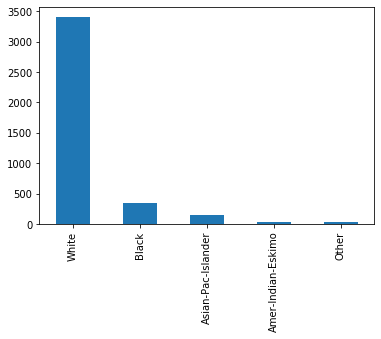

In [212]:
other_train['color'].value_counts().plot(kind='bar')